<a href="https://colab.research.google.com/github/yh08037/Introduction-to-Intelligent-Systems/blob/master/HW5_1_A_badinit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5-1  K-means
## A) Clustering some synthetic data

### Loading data and Initialization

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


name_file = "./data_kmeans.txt"

columns = ['x1', 'x2']

x = np.asarray(pd.read_csv(name_file, names=columns, sep='\t'))

I, N = x.shape

K = 3  # given

y = np.zeros((I, 1))

mu = np.random.uniform(-1, 9, (N, K))

### Definition of distortion function

In [0]:
def distortion(x, mu):
    
    result = 0.
    
    _I = x.shape[0]
    _K = mu.shape[1]
    
    for i in range(_I):
        tmp = []
        for k in range(_K):
            tmp.append(np.linalg.norm(x[i]-mu[:, k]) ** 2)
        _argmin = np.argmin(tmp)
        for k in range(_K):
            if k == _argmin:
                result += tmp[_argmin]
    return result

### Training the model

iteration 1
mu_k
 (4.159811111111111, 5.109011111111111) 
 (1.8450559782608695, 5.010477173913041) 
 (4.5132127638190935, 1.9557056783919613)
distortion
 874.3584255746202

iteration 2
mu_k
 (3.7134, 5.0888375) 
 (1.738459411764706, 5.0061599999999995) 
 (4.5132127638190935, 1.9557056783919613)
distortion
 864.4886525762171

iteration 3
mu_k
 (3.4452, 5.0571125) 
 (1.616865584415585, 5.007458441558441) 
 (4.5132127638190935, 1.9557056783919613)
distortion
 860.2752404182435

iteration 4
mu_k
 (3.2740466666666674, 5.066586666666666) 
 (1.5346767605633806, 4.999259154929578) 
 (4.5132127638190935, 1.9557056783919613)
distortion
 858.708282009344

iteration 5
mu_k
 (3.2217156250000007, 5.058853124999999) 
 (1.508529710144928, 5.000894202898551) 
 (4.5132127638190935, 1.9557056783919613)
distortion
 858.43760188858

iteration 6
mu_k
 (3.1969454545454554, 5.057854545454545) 
 (1.4953566176470592, 5.000526470588236) 
 (4.5132127638190935, 1.9557056783919613)
distortion
 858.4055121975753

it

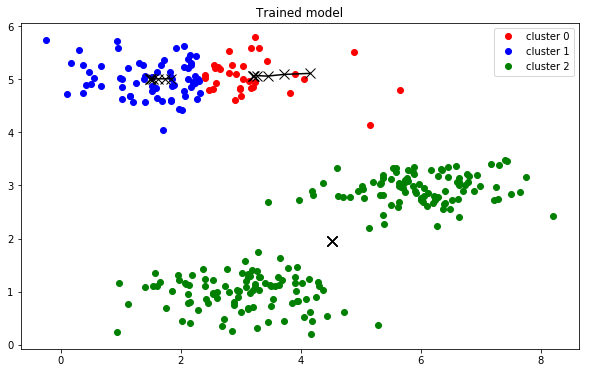


TRAIN	 | cluster 0		 | cluster 1		 | cluster 2		 | total
--------------------------------------------------------------------------------------------
number	 | 33			 | 68			 | 199			 | 300
--------------------------------------------------------------------------------------------
mu_k	 | (3.196945, 5.057855)	 | (1.495357, 5.000526)	 | (4.513213, 1.955706)	 |


In [121]:
J_previous = 0.
J_present = 0.

epsilon = 0.0001
cnt = 0

mu_list = []

while cnt < 1 or abs(J_present - J_previous) > epsilon:
    for i in range(I):
        tmp = []
        for k in range(0, K):
            tmp.append(np.linalg.norm(x[i]-mu[:, k]))
        y[i] = np.argmin(tmp)

    for k in range(K):
        cnt1 = 0
        mu[:, k] = np.zeros(N)
        for i in range(I):
            if y[i, 0] == k:
                mu[:, k] += x[i]
                cnt1 += 1
        if cnt1 > 0:
            mu[:, k] /= cnt1
    
    J_previous = J_present
    J_present = distortion(x, mu)
    cnt += 1
    
    print('iteration', cnt)
    print("mu_k\n", (mu[0, 0], mu[1, 0]),'\n', (mu[0, 1], mu[1, 1]),'\n', (mu[0, 2], mu[1, 2]))
    print('distortion\n', J_present)
    print()
    
    mu_list.append(mu.copy())
    
plt.rcParams["figure.figsize"] = (10, 6)
    

plt.title('Trained model')        
plt.plot(x[(y==0)[:,0]][:,0], x[(y==0)[:,0]][:,1], 'ro', label='cluster 0')
plt.plot(x[(y==1)[:,0]][:,0], x[(y==1)[:,0]][:,1], 'bo', label='cluster 1')
plt.plot(x[(y==2)[:,0]][:,0], x[(y==2)[:,0]][:,1], 'go', label='cluster 2')

for i in range(cnt):
    plt.plot(mu_list[i][0, 0], mu_list[i][1, 0], 'kx', markersize = 10)
    plt.plot(mu_list[i][0, 1], mu_list[i][1, 1], 'kx', markersize = 10)
    plt.plot(mu_list[i][0, 2], mu_list[i][1, 2], 'kx', markersize = 10)
    
plt.plot([mu_list[i][0][0] for i in range(cnt)], [mu_list[i][1][0] for i in range(cnt)], 'k')
plt.plot([mu_list[i][0][1] for i in range(cnt)], [mu_list[i][1][1] for i in range(cnt)], 'k')
plt.plot([mu_list[i][0][2] for i in range(cnt)], [mu_list[i][1][2] for i in range(cnt)], 'k')

plt.legend()
plt.show()

print()
print('TRAIN\t | cluster 0\t\t | cluster 1\t\t | cluster 2\t\t | total')
print('--------------------------------------------------------------------------------------------')
print('number\t | %d\t\t\t | %d\t\t\t | %d\t\t\t | %d' %(x[(y==0)[:,0]].shape[0], 
                                       x[(y==1)[:,0]].shape[0], 
                                       x[(y==2)[:,0]].shape[0],
                                       x.shape[0]))
print('--------------------------------------------------------------------------------------------')
print('mu_k\t | (%f, %f)\t | (%f, %f)\t | (%f, %f)\t |' %(mu[0, 0], mu[1, 0],
                                                      mu[0, 1], mu[1, 1], 
                                                      mu[0, 2], mu[1, 2]))

### Generating test data and Prediction

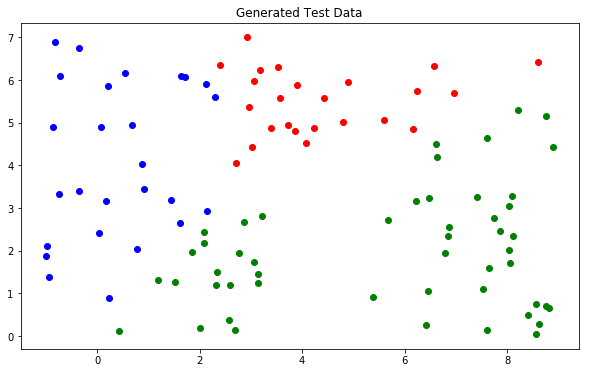


TEST	 | cluster 0	 | cluster 1	 | cluster 2	 | total
------------------------------------------------------------------------
number	 | 24		 | 26		 | 50		 | 100


In [122]:

I_test = 100

N_test = 2

x_test = np.hstack((np.random.uniform(-1, 9, (I_test, 1)), np.random.uniform(0, 7, (I_test, 1))))
                           
y_test = np.zeros((I_test, 1))


for i in range(I_test):
    tmp = []
    for k in range(0, K):
        tmp.append(np.linalg.norm(x_test[i]-mu[:, k]))
    y_test[i] = np.argmin(tmp)
    
plt.title('Generated Test Data')
plt.plot(x_test[(y_test==0)[:,0]][:,0], x_test[(y_test==0)[:,0]][:,1], 'ro')
plt.plot(x_test[(y_test==1)[:,0]][:,0], x_test[(y_test==1)[:,0]][:,1], 'bo')
plt.plot(x_test[(y_test==2)[:,0]][:,0], x_test[(y_test==2)[:,0]][:,1], 'go')
plt.show()

print()
print('TEST\t | cluster 0\t | cluster 1\t | cluster 2\t | total')
print('------------------------------------------------------------------------')
print('number\t | %d\t\t | %d\t\t | %d\t\t | %d' %(x_test[(y_test==0)[:,0]].shape[0], 
                                       x_test[(y_test==1)[:,0]].shape[0], 
                                       x_test[(y_test==2)[:,0]].shape[0],
                                       x_test.shape[0]))


### Ploting train / test data and decision boundary

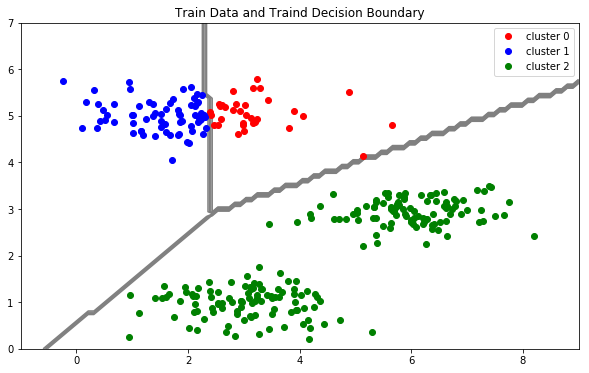

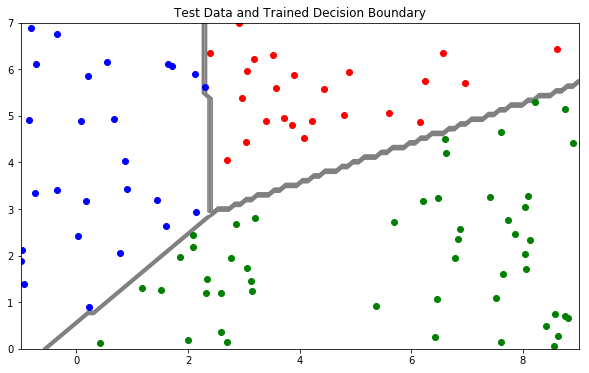

In [123]:
X, Y = np.meshgrid(np.linspace(-1, 9, 100), np.linspace(0, 7, 70))

Z = np.empty((70, 100))

for i in range(70):
    for j in range(100):
        tmp = []
        for k in range(0, K):
            tmp.append(np.linalg.norm(np.asarray([X[i, j], Y[i, j]]) - mu[:, k]))
        Z[i, j] = np.argmin(tmp)
        
        
plt.title('Train Data and Traind Decision Boundary')    
plt.contour(X, Y, Z, colors='grey')       
plt.plot(x[(y==0)[:,0]][:,0], x[(y==0)[:,0]][:,1], 'ro', label='cluster 0')
plt.plot(x[(y==1)[:,0]][:,0], x[(y==1)[:,0]][:,1], 'bo', label='cluster 1')
plt.plot(x[(y==2)[:,0]][:,0], x[(y==2)[:,0]][:,1], 'go', label='cluster 2')
plt.legend()
plt.show()


plt.title('Test Data and Trained Decision Boundary')
plt.contour(X, Y, Z, colors='grey') 
plt.plot(x_test[(y_test==0)[:,0]][:,0], x_test[(y_test==0)[:,0]][:,1], 'ro', label='cluster 0')
plt.plot(x_test[(y_test==1)[:,0]][:,0], x_test[(y_test==1)[:,0]][:,1], 'bo', label='cluster 1')
plt.plot(x_test[(y_test==2)[:,0]][:,0], x_test[(y_test==2)[:,0]][:,1], 'go', label='cluster 2')
plt.show()